<a href="https://colab.research.google.com/github/arunimaupreti/Machine-learning/blob/main/Support_vector_regression_on_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## **Loading Data**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving insurance.csv to insurance.csv


In [ ]:


# Replace 'filename.xlsx' with your actual file name
df = pd.read_csv('insurance.csv')


In [ ]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **Data cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## **Feature Engineering**

In [ ]:
Male = pd.get_dummies(df['sex'], drop_first = True)
df = pd.concat([df,Male], axis =1)
df.head()


,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True


In [ ]:
Smoker = pd.get_dummies(df['smoker'], drop_first = True)
df = pd.concat([df,Smoker], axis =1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [ ]:
df = df.rename(columns = {'yes':'Smoker'})
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## **Exploratory Analysis**

<ipython-input-13-68383f0d2e42>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = 'sex', data=df, palette='GnBu', legend=False)


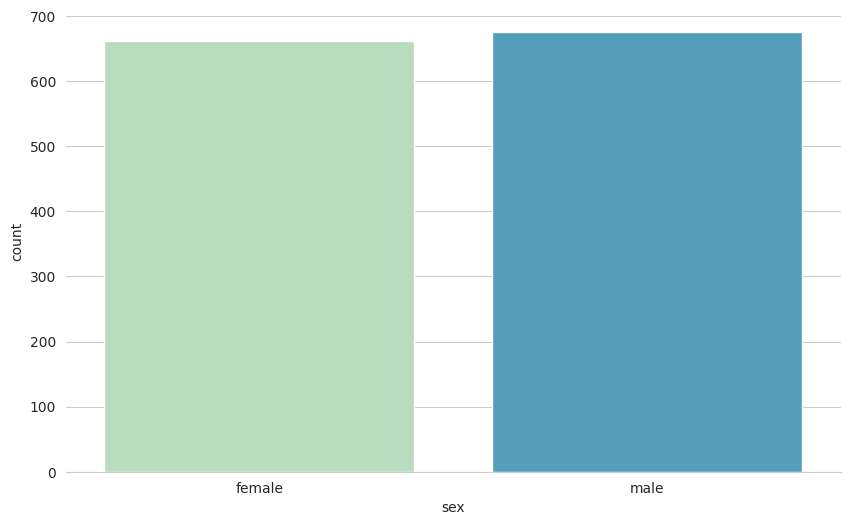

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot( x = 'sex', data=df, palette='GnBu', legend=False)
sns.despine(left = True)

## **Exploratory Analysis**

## **Relationship of smoking and gender to charges**

<ipython-input-14-d6f3a3005e7a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( x = 'sex',y = 'charges',data=df, palette='GnBu', legend=False)


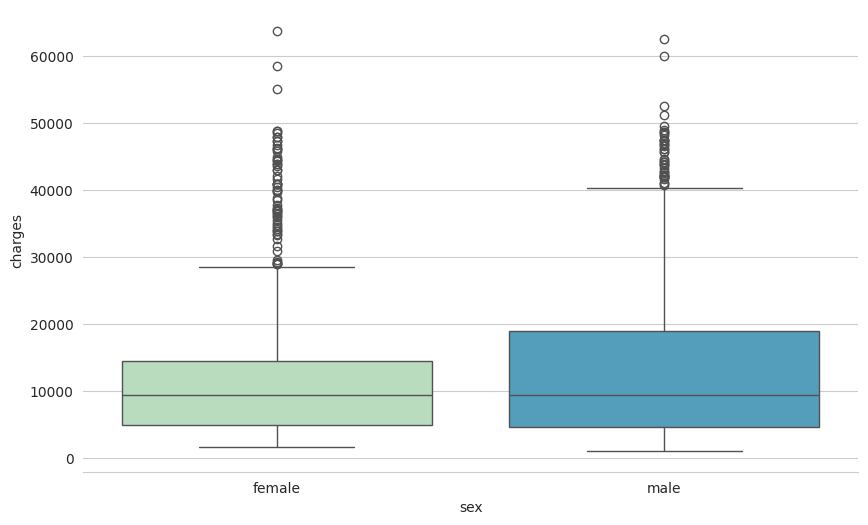

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.boxplot( x = 'sex',y = 'charges',data=df, palette='GnBu', legend=False)
sns.despine(left = True)

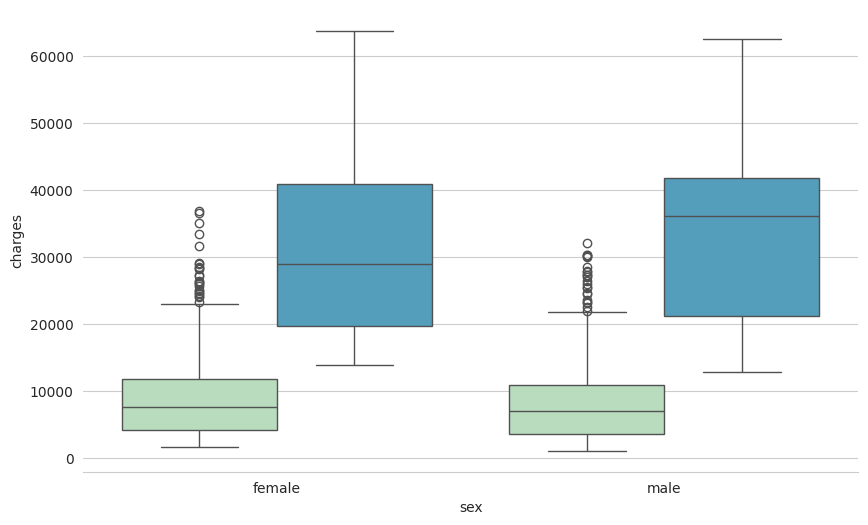

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.boxplot( x = 'sex',y = 'charges',data=df, palette='GnBu', legend=False, hue = 'Smoker')
sns.despine(left = True)

<Axes: xlabel='age', ylabel='charges'>

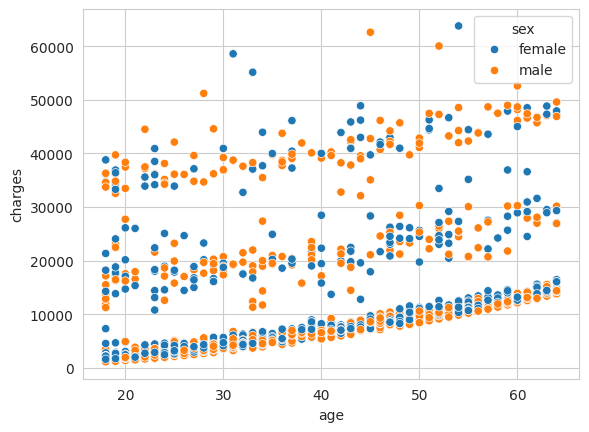

In [ ]:
sns.scatterplot(x = 'age', y = 'charges', data = df, hue = 'sex')

<Axes: xlabel='age', ylabel='charges'>

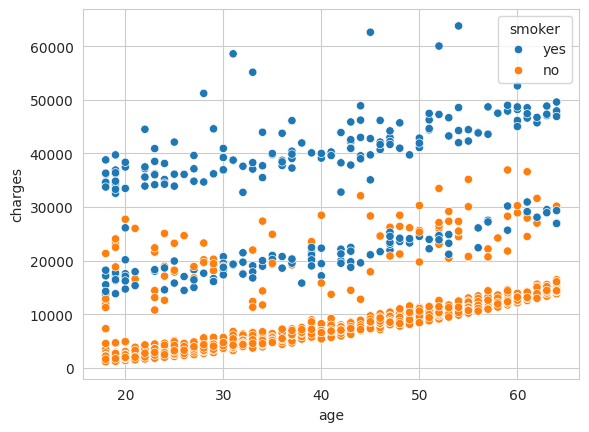

In [ ]:
sns.scatterplot(x = 'age', y = 'charges', data = df, hue = 'smoker')

<Axes: xlabel='bmi', ylabel='charges'>

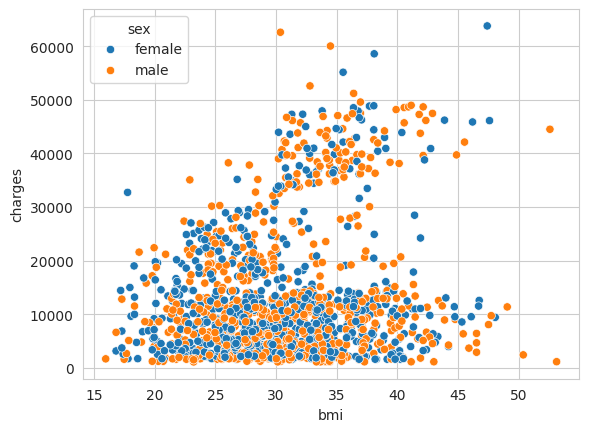

In [ ]:
sns.scatterplot(x = 'bmi',y = 'charges', data = df, hue = 'sex')

<Axes: xlabel='bmi', ylabel='charges'>

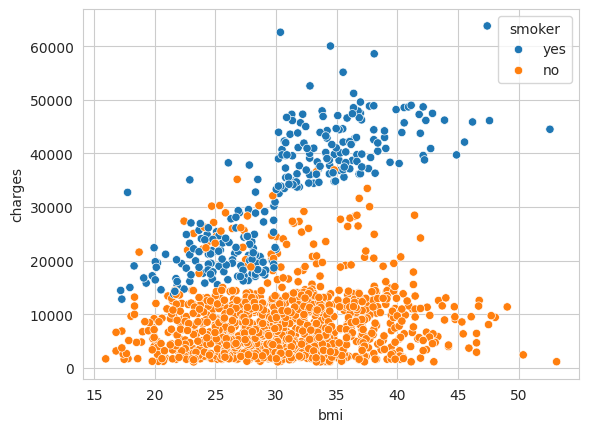

In [ ]:
sns.scatterplot(x = 'bmi',y = 'charges', data = df, hue = 'smoker')

<Axes: xlabel='age', ylabel='charges'>

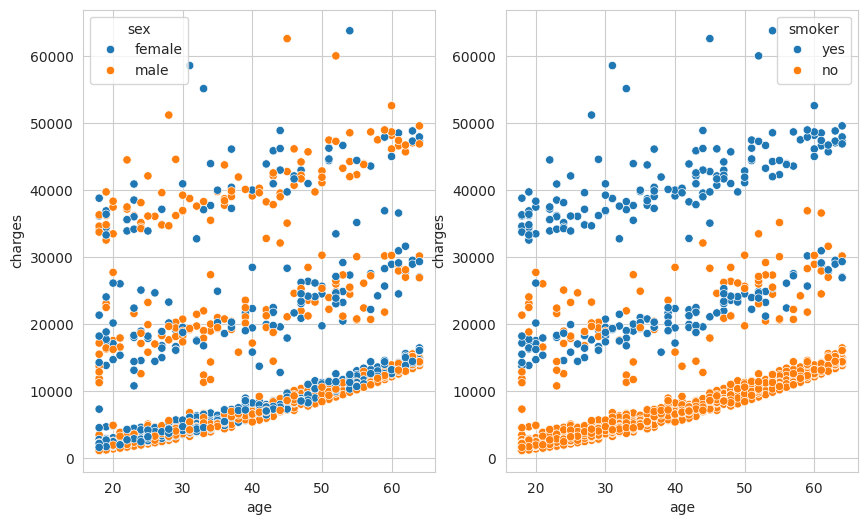

In [ ]:
fig, ax= plt.subplots(nrows = 1, ncols = 2,figsize = (10,6))
sns.scatterplot(x = 'age', y = 'charges', data = df, hue = 'sex', ax = ax[0])
sns.scatterplot(x = 'age', y = 'charges', data = df, hue = 'smoker', ax = ax[1])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [ ]:
df.drop(['sex','smoker','region'],axis = 1, inplace = True)

In [ ]:
df.head()

,age,bmi,children,charges,male,Smoker
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False


<Axes: >

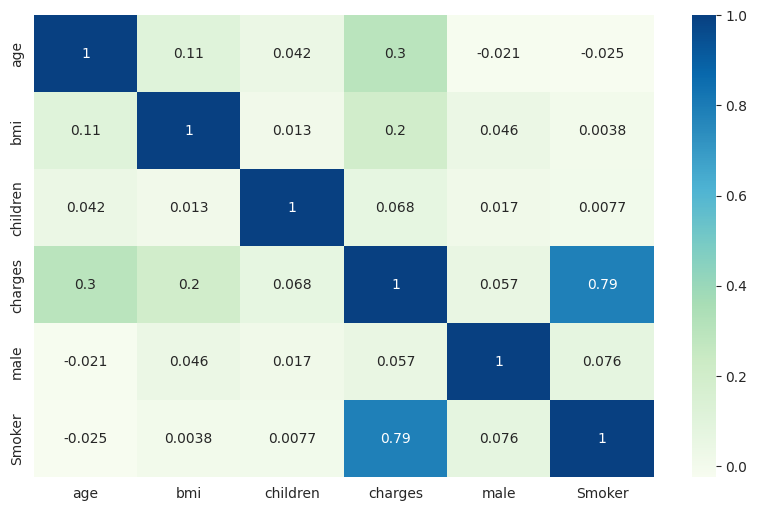

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, cmap = 'GnBu')

In [ ]:
df.corr()

,age,bmi,children,charges,male,Smoker
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251
male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185
Smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000


## **Splitting the data**

In [ ]:
x = df.drop('charges', axis = 1)
y = df['charges']


In [ ]:
x.head()

,age,bmi,children,male,Smoker
0,19,27.900,0,False,True
1,18,33.770,1,True,False
2,28,33.000,3,True,False
3,33,22.705,0,True,False
4,32,28.880,0,True,False


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4)

In [ ]:
x_train.shape

(802, 5)

In [ ]:
x_test.shape

(536, 5)

In [ ]:
df.head()

,age,bmi,children,charges,male,Smoker
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False


## **Scaling the Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_train)

## *Support Vector Regression Model*

In [ ]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(scaled_x_test, y_train)

SVR()

In [ ]:
predict = regressor.predict(scaled_x_test)

In [ ]:
predict.shape

(802,)

In [ ]:
y_test.shape

(536,)

In [ ]:
predict[:10]

array([9205.687749  , 9303.99807517, 9326.20272654, 9274.46841048,
       9257.30551495, 9245.0528945 , 9246.97918337, 9322.15175525,
       9320.74858561, 9201.96703451])

In [ ]:
y_test[:10]

,charges
986,8410.04685
759,36307.79830
1116,9222.40260
1158,2459.72010
452,1969.61400
668,45710.20785
376,21659.93010
753,11833.78230
223,34779.61500
532,12925.88600
